In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/CFA-CFA_MC')

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/CFA-CFA_MC/winequality-white.csv',sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
# Split the column names and create a new list of corrected names
new_columns = [col.split(';')[0] for col in data.columns]

# Assign the corrected column names to the DataFrame
data.columns = new_columns

# Now you should be able to access the 'quality' column
print(data['quality'].value_counts())

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
df = data.copy()

# Separate features and target
X = df.drop('quality', axis=1)
y = df['quality']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Random Forest ---
print("\n--- Random Forest Classifier ---")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# --- k-Nearest Neighbors ---
print("\n--- k-Nearest Neighbors Classifier ---")
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

# --- Multilayer Perceptron ---
print("\n--- Multilayer Perceptron Classifier ---")
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42) # Adjust parameters as needed
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_mlp))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp))


--- Random Forest Classifier ---

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.56      0.20      0.29        25
           5       0.70      0.70      0.70       291
           6       0.66      0.79      0.72       432
           7       0.76      0.58      0.66       192
           8       0.80      0.46      0.58        35

    accuracy                           0.69       980
   macro avg       0.58      0.45      0.49       980
weighted avg       0.69      0.69      0.68       980


Confusion Matrix:
[[  0   0   4   1   0   0]
 [  0   5  12   8   0   0]
 [  0   4 203  80   4   0]
 [  0   0  66 341  25   0]
 [  0   0   3  73 112   4]
 [  0   0   1  12   6  16]]

--- k-Nearest Neighbors Classifier ---

Classification Report:
              precision    recall  f1-score   support

           3       0.50      0.20      0.29         5
           4       0.19      0.20      0.19 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       1.00      0.08      0.15        25
           5       0.58      0.57      0.57       291
           6       0.52      0.67      0.59       432
           7       0.54      0.36      0.43       192
           8       0.00      0.00      0.00        35

    accuracy                           0.54       980
   macro avg       0.44      0.28      0.29       980
weighted avg       0.53      0.54      0.52       980


Confusion Matrix:
[[  0   0   1   4   0   0]
 [  0   2  16   7   0   0]
 [  0   0 165 122   4   0]
 [  0   0  99 291  42   0]
 [  0   0   5 117  70   0]
 [  0   0   0  21  14   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


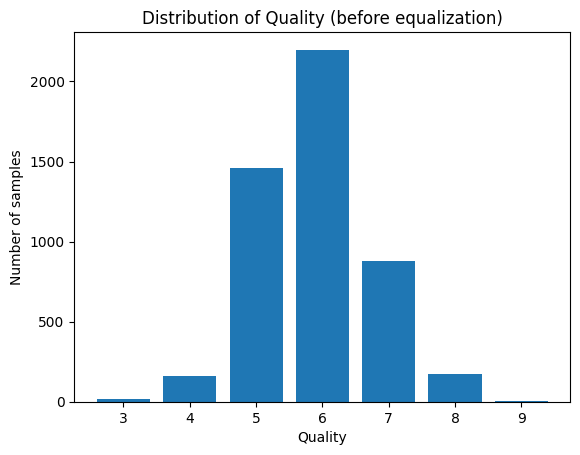

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Đếm số lượng mẫu cho mỗi giá trị quality
quality_counts = data['quality'].value_counts()

# Vẽ biểu đồ cột
plt.bar(quality_counts.index, quality_counts.values)
plt.xlabel('Quality')
plt.ylabel('Number of samples')
plt.title('Distribution of Quality (before equalization)')
plt.show()

In [ ]:
!pip install imblearn

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from cfa import CFA

# Load the dataset
df = data.copy()

# Separate features and target
X = df.drop('quality', axis=1).values
y = df['quality'].values

# Identify minority classes
unique_classes, counts = np.unique(y, return_counts=True)
minority_classes = unique_classes[counts < 300]  # Adjust threshold as needed

# Apply CFA to balance minority classes
synthetic_instances = []
synthetic_labels = []
for minority_class in minority_classes:
    print(f"Balancing class: {minority_class}")

    # Create a binary target variable for the current minority class
    y_binary = np.where(y == minority_class, 1, 0)

    # Apply CFA
    cfa = CFA(fd=2, tol=0.1)  # Adjust fd and tol as needed
    X_resampled, y_resampled = cfa.run_cfa(X, y_binary)

    # Extract synthetic instances for the current minority class
    synthetic_indices = np.where(y_resampled[len(y):] == 1)[0]
    synthetic_instances.extend(X_resampled[len(y):][synthetic_indices])
    synthetic_labels.extend([minority_class] * len(synthetic_indices))

# Combine original data with synthetic instances
X_balanced = np.concatenate((X, synthetic_instances))
y_balanced = np.concatenate((y, synthetic_labels))

# Save balanced data to a new CSV file
df_balanced = pd.DataFrame(X_balanced, columns=df.columns[:-1])
df_balanced['quality'] = y_balanced
df_balanced.to_csv("winequality-white_balanced.csv", sep=";", index=False)

# Split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42
)

# Feature scaling for balanced data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Random Forest ---
print("\n--- Random Forest Classifier (Balanced Data)---")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# --- k-Nearest Neighbors ---
print("\n--- k-Nearest Neighbors Classifier (Balanced Data)---")
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

# --- Multilayer Perceptron ---
print("\n--- Multilayer Perceptron Classifier (Balanced Data)---")
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42) # Adjust parameters
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_mlp))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp))

Balancing class: 3
Balancing class: 4
Balancing class: 8
Balancing class: 9

--- Random Forest Classifier (Balanced Data)---

Classification Report:
              precision    recall  f1-score   support

           3       0.93      0.91      0.92       921
           4       0.79      0.80      0.80       908
           5       0.75      0.56      0.65       308
           6       0.60      0.64      0.62       423
           7       0.67      0.43      0.53       190
           8       0.79      0.81      0.80      1004
           9       0.81      0.91      0.86       952

    accuracy                           0.80      4706
   macro avg       0.77      0.72      0.74      4706
weighted avg       0.80      0.80      0.80      4706


Confusion Matrix:
[[836  28   0   5   1  32  19]
 [ 18 727  14  25   4  59  61]
 [  6  34 174  67   2  10  15]
 [  9  29  21 270  18  46  30]
 [  5   7   3  44  82  36  13]
 [ 22  61  12  25  15 809  60]
 [  2  29   7  15   0  28 871]]

--- k-Nearest Ne

In [ ]:
# --- Save balanced data to a new CSV file ---
df_balanced = pd.DataFrame(X_balanced, columns=df.columns[:-1])
df_balanced['quality'] = y_balanced
df_balanced.to_csv("/content/drive/MyDrive/CFA-CFA_MC/winequality-white_balanced.csv", sep=";", index=False)

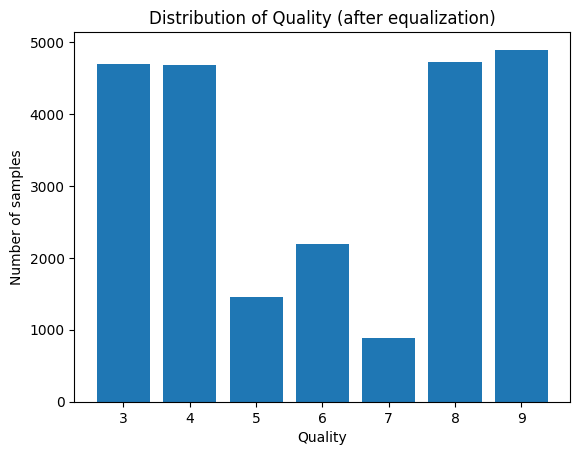

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Đếm số lượng mẫu cho mỗi giá trị quality
quality_counts = df_balanced['quality'].value_counts()

# Vẽ biểu đồ cột
plt.bar(quality_counts.index, quality_counts.values)
plt.xlabel('Quality')
plt.ylabel('Number of samples')
plt.title('Distribution of Quality (after equalization)')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/CFA-CFA_MC/winequality-white.csv', sep=';')

# Separate features and target
X = data.drop(columns=['quality']).values
y = data['quality'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for each class
X_resampled = []
y_resampled = []
for class_label in np.unique(y_train):
    # Create a binary target variable for the current class
    y_binary = (y_train == class_label).astype(int)

    # Determine k_neighbors based on available samples for the class
    k = min(5, np.sum(y_binary) - 1)  # Ensure k_neighbors is less than the number of samples

    # Apply SMOTE to oversample the minority class
    # If there's only one sample for the class, SMOTE won't be applied
    if np.sum(y_binary) > 1:
        smote_temp = SMOTE(random_state=42, k_neighbors=k)  # Create a temporary SMOTE object with adjusted k
        X_oversampled, y_oversampled = smote_temp.fit_resample(X_train, y_binary)

        # Extract instances belonging to the current class from the oversampled data
        indices = np.where(y_oversampled == 1)[0]
        X_resampled.extend(X_oversampled[indices])
        y_resampled.extend([class_label] * len(indices))
    else:
        # Handle the case where there's only one sample for the class
        indices = np.where(y_binary == 1)[0]
        X_resampled.extend(X_train[indices])
        y_resampled.extend([class_label] * len(indices))

# Convert lists to numpy arrays
X_resampled = np.array(X_resampled)
y_resampled = np.array(y_resampled)

# ----------------------------------
# Train and evaluate classifiers
# ----------------------------------

# 1. Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_resampled, y_resampled)
y_pred_rf = rf.predict(X_test)

# 2. k-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_resampled, y_resampled)
y_pred_knn = knn.predict(X_test)

# 3. Multilayer Perceptron Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), random_state=42)
mlp.fit(X_resampled, y_resampled)
y_pred_mlp = mlp.predict(X_test)

# ----------------------------------
# Print evaluation results
# ----------------------------------

def evaluate_classifier(y_test, y_pred, classifier_name):
    print(f"\n--- Evaluation for {classifier_name} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

evaluate_classifier(y_test, y_pred_rf, "Random Forest")
evaluate_classifier(y_test, y_pred_knn, "k-Nearest Neighbors")
evaluate_classifier(y_test, y_pred_mlp, "Multilayer Perceptron")


--- Evaluation for Random Forest ---
Confusion Matrix:
 [[  1   0   2   2   0   0]
 [  1  13   7   4   0   0]
 [  2  23 204  48  12   2]
 [  2   9  81 252  78  10]
 [  0   2   4  32 135  19]
 [  1   0   1   1  14  18]]
Classification Report:
               precision    recall  f1-score   support

           3       0.14      0.20      0.17         5
           4       0.28      0.52      0.36        25
           5       0.68      0.70      0.69       291
           6       0.74      0.58      0.65       432
           7       0.56      0.70      0.63       192
           8       0.37      0.51      0.43        35

    accuracy                           0.64       980
   macro avg       0.46      0.54      0.49       980
weighted avg       0.66      0.64      0.64       980

Accuracy: 0.6357142857142857

--- Evaluation for k-Nearest Neighbors ---
Confusion Matrix:
 [[  1   0   3   0   1   0   0]
 [ 10   5   4   3   1   2   0]
 [ 32  36 130  45  34  13   1]
 [ 26  48 105 125  76  35  1

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/CFA-CFA_MC/winequality-white.csv', sep=';')

# Separate features and target
X = data.drop(columns=['quality']).values
y = data['quality'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create classifiers
rf = RandomForestClassifier(n_estimators=100, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
mlp = MLPClassifier(hidden_layer_sizes=(100,), random_state=42)

# Apply OVO strategy with ADASYN
ovo_rf = OneVsOneClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
ovo_knn = OneVsOneClassifier(KNeighborsClassifier(n_neighbors=5))
ovo_mlp = OneVsOneClassifier(MLPClassifier(hidden_layer_sizes=(100,), random_state=42))

# --- Define the function before calling it ---
def evaluate_classifier(y_test, y_pred, classifier_name):
    print(f"\n--- Evaluation for {classifier_name} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))


# Train and evaluate classifiers
for clf, name in [(ovo_rf, "Random Forest OVO"), (ovo_knn, "k-NN OVO"), (ovo_mlp, "MLP OVO")]:
    # Ensure the classifier is fit at least once outside the loops
    clf.fit(X_train, y_train) #This will ensure the classifier is fit in the case the loops do not execute

    for i in range(len(np.unique(y_train))):
        for j in range(i + 1, len(np.unique(y_train))):
            # Get indices for the current pair of classes
            indices = np.where((y_train == np.unique(y_train)[i]) | (y_train == np.unique(y_train)[j]))[0]
            # Extract data for the current pair of classes
            X_pair = X_train[indices]
            y_pair = y_train[indices]

            # Check if both classes have at least two samples
            if len(np.unique(y_pair)) == 2 and min(np.bincount(y_pair)) > 1:
                # Create ADASYN object with adjusted n_neighbors
                n_neighbors = min(5, min(np.bincount(y_pair)) - 1)
                # Ensure n_neighbors is at least 1
                if n_neighbors < 1:
                    n_neighbors = 1
                adasyn = ADASYN(random_state=42, n_neighbors=n_neighbors)
                # Resample data for the current pair of classes
                X_resampled, y_resampled = adasyn.fit_resample(X_pair, y_pair)
                # Train classifier on the resampled data
                clf.fit(X_resampled, y_resampled)

    # Predict and evaluate
    y_pred = clf.predict(X_test)
    evaluate_classifier(y_test, y_pred, name)


--- Evaluation for Random Forest OVO ---
Confusion Matrix:
 [[  1   0   3   1   0   0]
 [  1   7  11   6   0   0]
 [  0   5 202  80   4   0]
 [  0   0  65 346  21   0]
 [  0   0   5  74 108   5]
 [  0   0   1   8  10  16]]
Classification Report:
               precision    recall  f1-score   support

           3       0.50      0.20      0.29         5
           4       0.58      0.28      0.38        25
           5       0.70      0.69      0.70       291
           6       0.67      0.80      0.73       432
           7       0.76      0.56      0.64       192
           8       0.76      0.46      0.57        35

    accuracy                           0.69       980
   macro avg       0.66      0.50      0.55       980
weighted avg       0.70      0.69      0.69       980

Accuracy: 0.6938775510204082

--- Evaluation for k-NN OVO ---
Confusion Matrix:
 [[  0   0   3   1   1   0]
 [  0   3  13   8   1   0]
 [  0   3 136 126  24   2]
 [  0   3 110 269  49   1]
 [  0   0  26 102  6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_


--- Evaluation for MLP OVO ---
Confusion Matrix:
 [[  0   0   1   4   0   0]
 [  0   1  14  10   0   0]
 [  0   1  74 208   8   0]
 [  0   0  47 314  71   0]
 [  0   0   7 120  65   0]
 [  0   0   1  18  16   0]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.50      0.04      0.07        25
           5       0.51      0.25      0.34       291
           6       0.47      0.73      0.57       432
           7       0.41      0.34      0.37       192
           8       0.00      0.00      0.00        35

    accuracy                           0.46       980
   macro avg       0.31      0.23      0.23       980
weighted avg       0.45      0.46      0.43       980

Accuracy: 0.463265306122449


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and 